In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
from shallowAE import ShallowAE
from sparseShallowAE import SparseShallowAE_KL, SparseShallowAE_L1, SparseShallowAE_KL_sum
import datetime

Using TensorFlow backend.


In [2]:
import keras
keras.__version__

'2.2.0'

In [3]:
FILE_PATH = "../"
data = bastien_utils.load_data(FILE_PATH, train=True, test=True, subsetTest=True)
x_train, y_train, x_test, y_test, x_small, y_small = data
print('x_small shape:', x_small.shape)
print('x_test shape:', x_test.shape)

x_small shape: (10, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [4]:
AE = ShallowAE(latent_dim=10, nb_rows=32, nb_columns=44, nb_input_channels=3,one_channel_output=False)

In [7]:
AE.decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4224)              46464     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 4224)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 32, 44, 3)         0         
Total params: 46,464
Trainable params: 46,464
Non-trainable params: 0
_________________________________________________________________


In [4]:
AE = ShallowAE.load('18_07_09_dim100.h5')

In [14]:
AE.train(X_train=x_train, X_train_expected_output=x_train, X_val=(x_test, x_test), nb_epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 95us/step - loss: 0.0082 - val_loss: 0.0083
Epoch 2/5
60000/60000 [==============================] - 6s 107us/step - loss: 0.0082 - val_loss: 0.0083
Epoch 3/5
60000/60000 [==============================] - 7s 115us/step - loss: 0.0082 - val_loss: 0.0083
Epoch 4/5
60000/60000 [==============================] - 6s 99us/step - loss: 0.0082 - val_loss: 0.0083
Epoch 5/5
60000/60000 [==============================] - 6s 106us/step - loss: 0.0082 - val_loss: 0.0083


In [16]:
AE.get_encoder().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               78500     
Total params: 78,500
Trainable params: 78,500
Non-trainable params: 0
_________________________________________________________________


In [17]:
AE.get_decoder().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 784)               79184     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 784)               0         
_________________________________________________________________
reshape_6 (Reshape)          (None, 28, 28, 1)         0         
Total params: 79,184
Trainable params: 79,184
Non-trainable params: 0
_________________________________________________________________


In [18]:
AE.get_autoencoder().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
encoder (Model)              (None, 100)               78500     
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         79184     
Total params: 157,684
Trainable params: 157,684
Non-trainable params: 0
_________________________________________________________________


In [20]:
AE.save()

In [11]:
AE.total_loss(x_test)

0.008433725115656853

Too big channel number...plotting channel 0 instead...


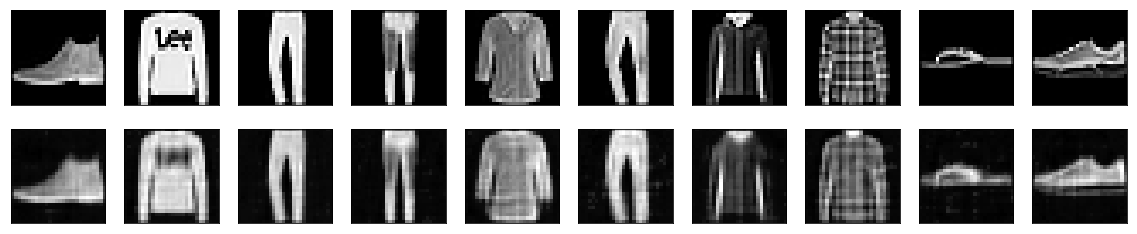

In [23]:
AE.plot_reconstructions(x_test, channel_to_plot=1)

Too big channel number...plotting channel 0 instead...


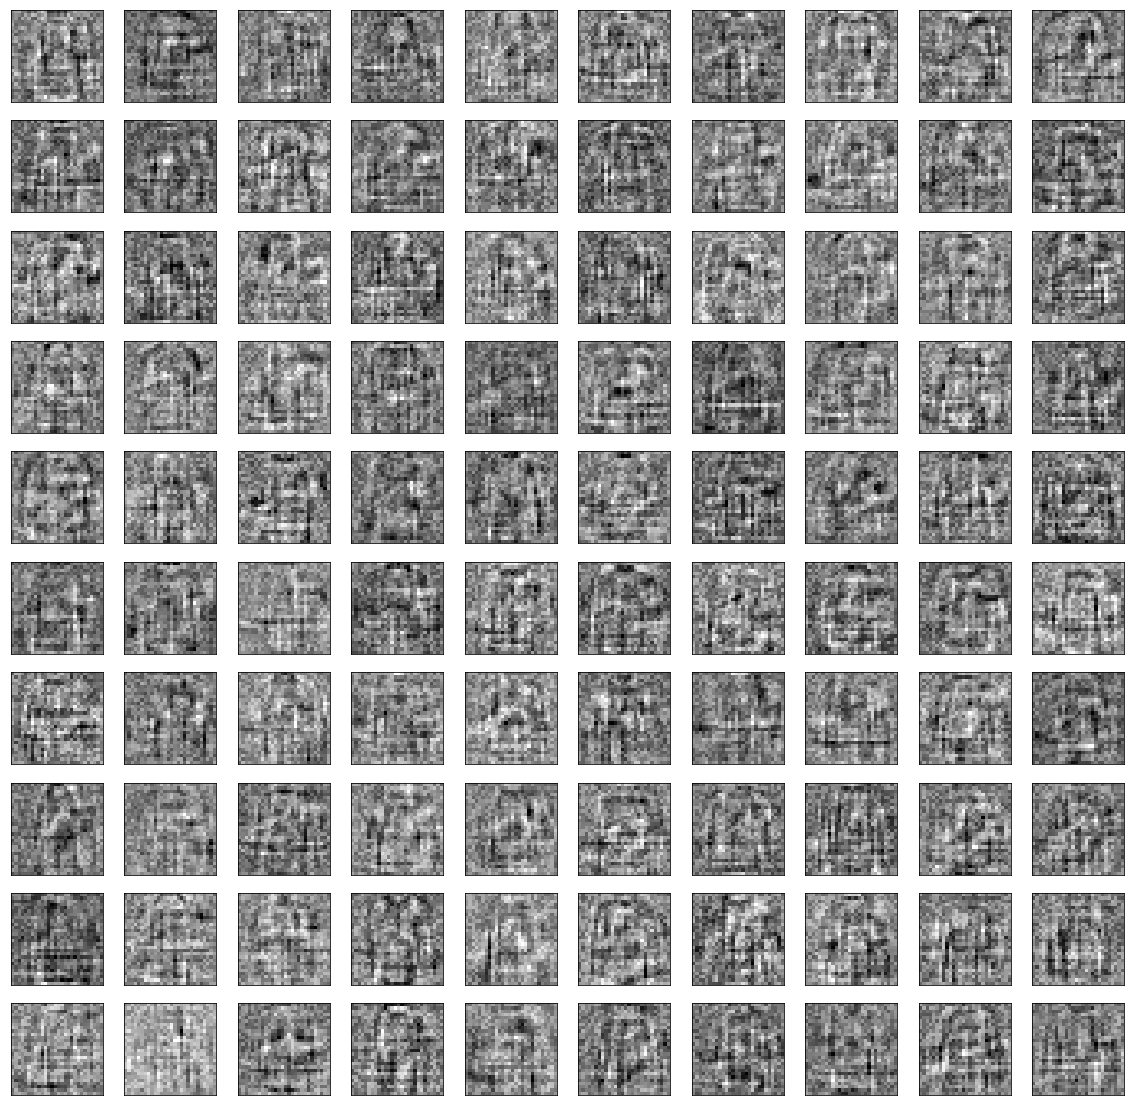

In [29]:
AE.plot_atoms_encoder(channel_to_plot=1)

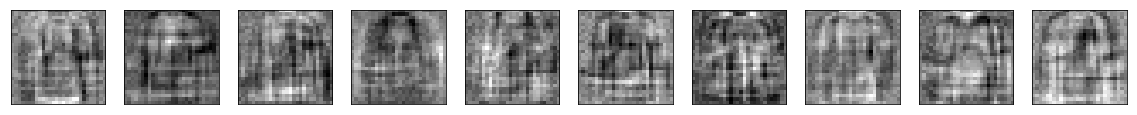

In [33]:
AE.plot_atoms_decoder(nb_to_plot=10, channel_to_plot=0, add_bias=False)

In [36]:
a = AE.best_SVM_classification_score(x_test, y_test, nb_values_C=2, nb_values_gamma=2)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] C=0.01, gamma=0.001 .............................................
[CV] .............................. C=0.01, gamma=0.001, total=  20.4s
[CV] C=0.01, gamma=0.001 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.4s remaining:    0.0s


[CV] .............................. C=0.01, gamma=0.001, total=  19.9s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .............................. C=0.01, gamma=0.001, total=  19.9s
[CV] C=0.01, gamma=100.0 .............................................
[CV] .............................. C=0.01, gamma=100.0, total=  21.5s
[CV] C=0.01, gamma=100.0 .............................................
[CV] .............................. C=0.01, gamma=100.0, total=  21.8s
[CV] C=0.01, gamma=100.0 .............................................
[CV] .............................. C=0.01, gamma=100.0, total=  21.8s
[CV] C=1000.0, gamma=0.001 ...........................................
[CV] ............................ C=1000.0, gamma=0.001, total=   3.1s
[CV] C=1000.0, gamma=0.001 ...........................................
[CV] ............................ C=1000.0, gamma=0.001, total=   3.3s
[CV] C=1000.0, gamma=0.001 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  5.3min finished


In [37]:
a[1]

{'C': 1000.0, 'gamma': 0.001}

In [40]:
a[0]

0.831

In [39]:
AE.svm_classifiation_score(x_test, y_test, **a[1])

0.834

In [40]:
def add(x, x_square=5, y_square=5):
    x[x_square - 5: x_square+5, y_square-5:y_square+5]=0
    return x 

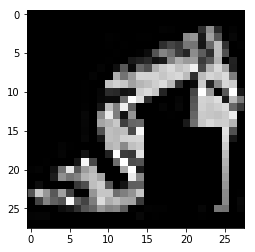

In [41]:
plt.imshow(add(x_small[5,:,:,0], 20, 20))

In [9]:
AE_transpose = AE.apply_operator_to_decoder_atoms(np.transpose, apply_to_bias=True)

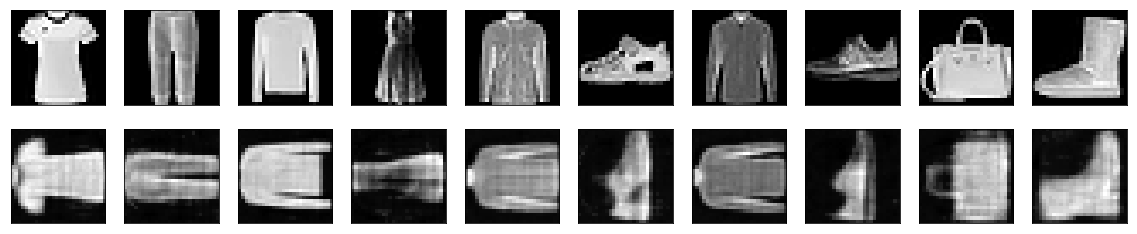

In [10]:
AE_transpose.plot_reconstructions(x_small)

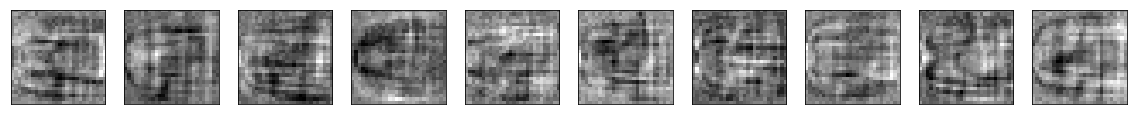

In [44]:
AE_transpose.plot_atoms_decoder(nb_to_plot=10)

In [6]:
AE.max_approximation_error(x_test, np.transpose)

(0.008937337563931941, 0.0005096856130752713)

In [5]:
AE.max_approximation_error(x_test, np.transpose, apply_to_bias=True)

(0.008433712774515151, 1.3397589305469081e-14)

In [6]:
AE.sparsity_measure(x_test)

0.076194376

In [16]:
AE_l1 = SparseShallowAE_L1.load('18_07_11_dim100_L1_1e-05.h5')

In [17]:
H_l1 =AE_l1.encode(x_test)

In [18]:
np.sum(H_l1>0.1)

88228

In [19]:
np.sum(H_l1<0.1)

911772

In [20]:
H = AE.encode(x_test)

In [21]:
np.sum(H>0.1)

991837

In [22]:
AE.sparsity_measure(x_test)

0.076194376

In [23]:
AE_l1.sparsity_measure(x_test)

0.7373364

In [36]:
AE = ShallowAE.load('18_07_10_dim500.h5')

In [37]:
AE.sparsity_measure(x_test)

0.03272886

In [15]:
H_l1

array([[2.1207637e-14, 1.9928166e-14, 2.7653747e-14, ..., 3.1012580e-14,
        3.9351155e-14, 2.4891994e-14],
       [3.1592140e-35, 1.7210454e-35, 4.6495003e-35, ..., 2.0043530e-35,
        3.1795010e-35, 8.2880611e-35],
       [6.3768263e-19, 4.8837462e-19, 4.7031251e-19, ..., 6.9294037e-19,
        8.0281363e-19, 1.0396990e-18],
       ...,
       [9.3809082e-14, 2.2123663e-13, 2.6885739e-13, ..., 1.1622139e-13,
        2.3751349e-13, 2.8895563e-13],
       [6.2916654e-15, 6.6360508e-15, 5.6540080e-15, ..., 5.5752975e-15,
        6.9299458e-15, 6.0707957e-15],
       [4.6550847e-11, 4.1401049e-11, 4.3724135e-11, ..., 3.5234059e-11,
        3.1071125e-11, 4.4784849e-11]], dtype=float32)

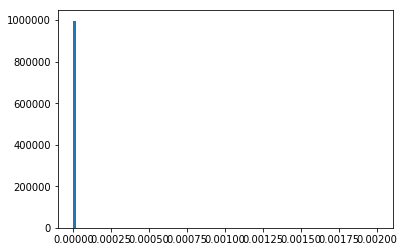

In [13]:
plt.hist(H_l1.flatten(), bins=100)
plt.show()

In [10]:
b = AE.decoder.get_weights()[1]
w = AE.decoder.get_weights()[0]

In [11]:
w.shape

(100, 784)

In [9]:
b.shape

(784,)

In [12]:
b_op = b.reshape((28,28,1))

In [20]:
a = b_op.flatten()

In [21]:
a.shape

(784,)

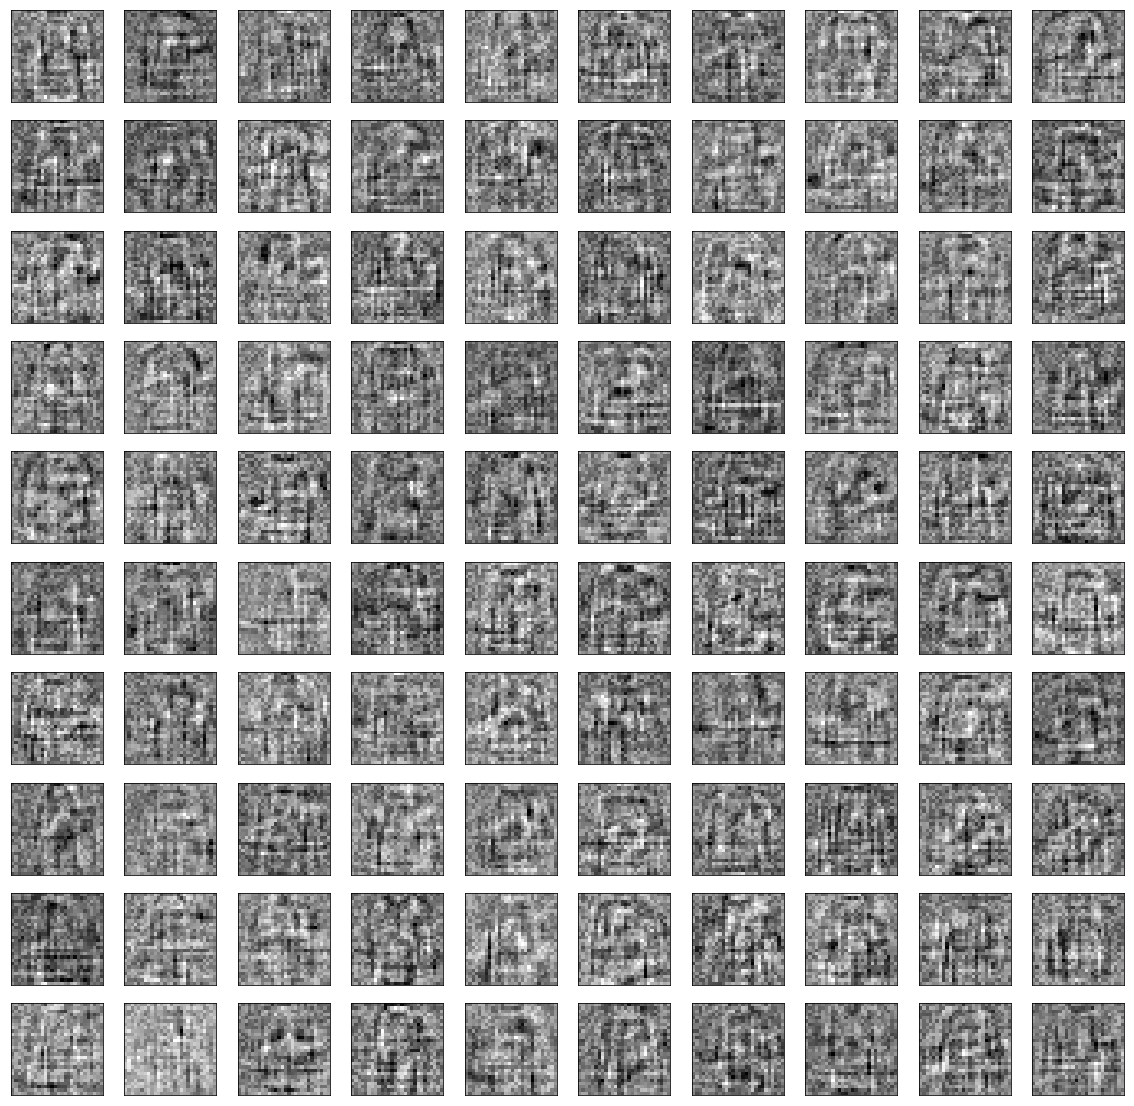

In [14]:
AE_transpose.plot_atoms_encoder()

In [51]:
AE.encoder.input_shape[2]

28

In [56]:
X_val = (x_small,x_small)

In [60]:
len(X_val)

2

In [61]:
len(x_small)

10

In [59]:
if type(X_val) is tuple:
    print("saf")

saf


In [10]:
a = [np.all(AE.atom_images_decoder(add_bias=False, normalize=False)[:,:,0,i] == np.transpose(AE_transpose.atom_images_decoder(add_bias=False, normalize=False)[:,:,0,i])) for i in range(100)]

In [11]:
a

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [31]:
W_1 = AE.atom_images_decoder(add_bias=False)[:,:,0,1]
W_2 = AE_transpose.atom_images_decoder(add_bias=False)[:,:,0,1]

In [35]:
np.all(W_1== np.transpose(W_2))

True

In [24]:
W  = np.array([np.transpose(AE_transpose.atom_images_decoder()[:,:,0,i]) for i in range(100)])

In [25]:
W.shape

(100, 28, 28)

In [64]:
AE_KL = SparseShallowAE_KL(latent_dim=10, nb_rows=28, nb_columns=28, nb_input_channels=1, one_channel_output=True)

In [59]:
AE_KL.get_encoder().summary()
AE_KL.get_decoder().summary()
AE_KL.get_autoencoder().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_35 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_36 (InputLayer)        (None, 10)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 784)               8624      
_________________________________________________________________
leaky_re

Too big channel number...plotting channel 0 instead...


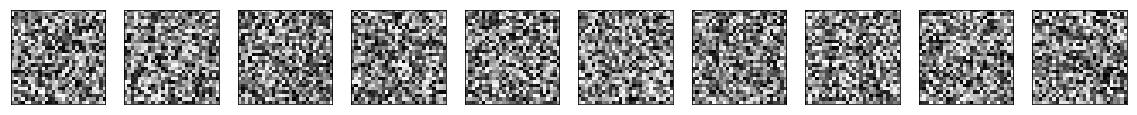

In [60]:
AE_KL.plot_atoms_decoder(channel_to_plot=1)

In [61]:
AE_transpose = AE_KL.apply_operator_to_decoder_atoms(np.transpose)

In [65]:
AE_KL.sparsity_measure(x_test)

0.04067751

In [66]:
AE_KL.train(x_train, X_val=x_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 80us/step - loss: 0.1089 - mean_squared_error: 0.1048 - val_loss: 0.0726 - val_mean_squared_error: 0.0705
Epoch 2/100
60000/60000 [==============================] - 5s 88us/step - loss: 0.0628 - mean_squared_error: 0.0601 - val_loss: 0.0551 - val_mean_squared_error: 0.0527
Epoch 3/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.0510 - mean_squared_error: 0.0481 - val_loss: 0.0470 - val_mean_squared_error: 0.0447
Epoch 4/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.0453 - mean_squared_error: 0.0426 - val_loss: 0.0430 - val_mean_squared_error: 0.0405
Epoch 5/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.0420 - mean_squared_error: 0.0393 - val_loss: 0.0406 - val_mean_squared_error: 0.0382
Epoch 6/100
60000/60000 [==============================] - 5s 77us/step - loss: 0.0398 - mean_squared_error: 0

60000/60000 [==============================] - 4s 68us/step - loss: 0.0284 - mean_squared_error: 0.0270 - val_loss: 0.0277 - val_mean_squared_error: 0.0267
Epoch 50/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.0283 - mean_squared_error: 0.0269 - val_loss: 0.0276 - val_mean_squared_error: 0.0265
Epoch 51/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.0283 - mean_squared_error: 0.0269 - val_loss: 0.0288 - val_mean_squared_error: 0.0270
Epoch 52/100
60000/60000 [==============================] - 4s 68us/step - loss: 0.0282 - mean_squared_error: 0.0269 - val_loss: 0.0279 - val_mean_squared_error: 0.0262
Epoch 53/100
60000/60000 [==============================] - 4s 68us/step - loss: 0.0283 - mean_squared_error: 0.0268 - val_loss: 0.0286 - val_mean_squared_error: 0.0272
Epoch 54/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.0281 - mean_squared_error: 0.0268 - val_loss: 0.0283 - val_mean_squared_error: 0.0266

60000/60000 [==============================] - 3s 56us/step - loss: 0.0271 - mean_squared_error: 0.0259 - val_loss: 0.0282 - val_mean_squared_error: 0.0266
Epoch 98/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.0271 - mean_squared_error: 0.0258 - val_loss: 0.0267 - val_mean_squared_error: 0.0254
Epoch 99/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.0272 - mean_squared_error: 0.0258 - val_loss: 0.0266 - val_mean_squared_error: 0.0256
Epoch 100/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.0269 - mean_squared_error: 0.0257 - val_loss: 0.0277 - val_mean_squared_error: 0.0259


In [69]:
AE_KL.loss_and_mse(x_test)

[array([0.02832298, 0.02805443, 0.02867585, 0.02788118, 0.02653861,
        0.02802259, 0.02835183, 0.02677455, 0.02765025, 0.0266884 ],
       dtype=float32), 0.02594329742193222]

In [70]:
AE_KL.sparsity_measure(x_test)

0.42625263

In [75]:
AE_KL.sparsity_measure(x_test[10].reshape((1,28,28,1)))

0.41989636

In [77]:
import math
H = AE_KL.encode(x_test)
sqrt = math.sqrt(AE_KL.latent_dim)
sigma = (sqrt - (np.linalg.norm(H, ord=1, axis=1)/np.linalg.norm(H, ord=2, axis=1)+0.0000001))/(sqrt - 1)

In [82]:
np.mean(sigma)

0.42625263

In [80]:
np.std(sigma)

0.15822993

In [84]:
import math
H = AE.encode(x_test)
sqrt = math.sqrt(AE.latent_dim)
sigma = (sqrt - (np.linalg.norm(H, ord=1, axis=1)/np.linalg.norm(H, ord=2, axis=1)+0.0000001))/(sqrt - 1)

In [85]:
np.mean(sigma)

0.03272886

In [86]:
np.std(sigma)

0.012073468

In [89]:
AE_KL.save(model_name='Test')

In [90]:
del AE_KL

In [96]:
AE_KL_sum = SparseShallowAE_KL_sum()

In [97]:
AE_KL_sum.save()

OSError: Unable to create file (unable to open file: name = '../ShallowAE/Sparse/KL_div_sum/Models/18_07_31_dim100_KLdivSum_1_0.1.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 242)

In [98]:
a = np.arange(12).reshape((4,3))

In [100]:
a.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [101]:
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])